<a href="https://colab.research.google.com/github/zidanematheus/exemplo-colaboratory/blob/main/Projeto_incendios_florestais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libs necessáias

# Libs para modelagem e matrizes
import numpy as np
import pandas as pd

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Libs para ignorar avisos
import warnings

# Desabilitandos avisos
warnings.filterwarnings('ignore')

In [3]:
# Lendo os dados
Base_Dados = pd.read_csv('Dados_Indendio.csv', encoding='latin-1')

# Verificando
Base_Dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
# Nulos
Base_Dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

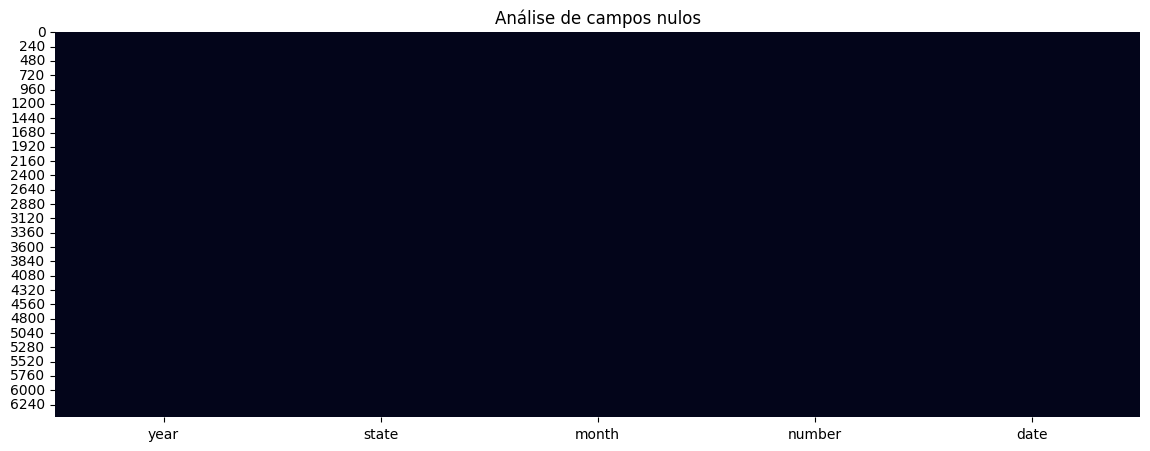

In [6]:
# Nulos Plot
plt.figure( figsize=(14, 5) )
plt.title('Análise de campos nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False );

In [7]:
# Estatísticas
Base_Dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [8]:
# Info
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [9]:
# Campos únicos
Base_Dados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

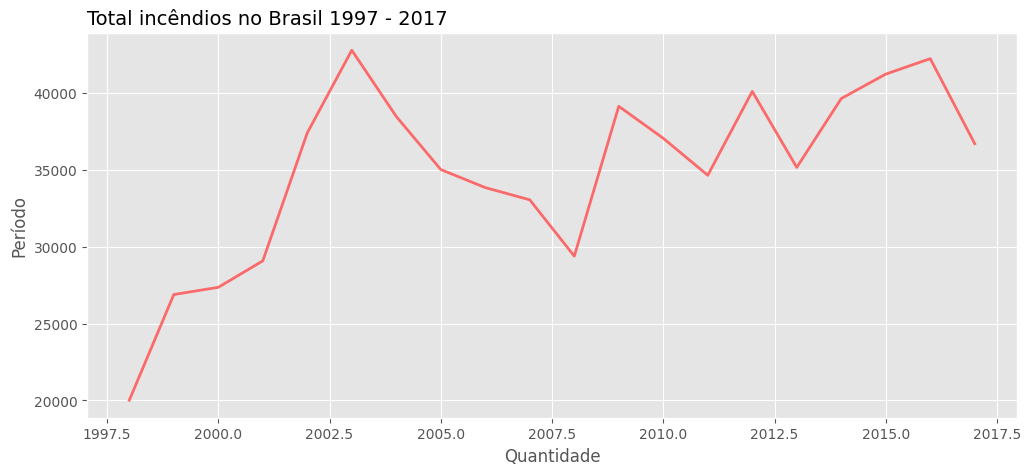

In [14]:
# Análise por ano dos incêndios
Analise = Base_Dados.groupby( by=['year'] ).sum().reset_index()

Analise.head()

# Tamanho
plt.figure( figsize=(12, 5) )

# Style
plt.style.use('ggplot')

# Gráfico
plt.title( 'Total incêndios no Brasil 1997 - 2017', loc='left', fontsize=14 )
sns.lineplot( data=Analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85 )

# Labels
plt.xlabel('Quantidade')
plt.ylabel('Período');

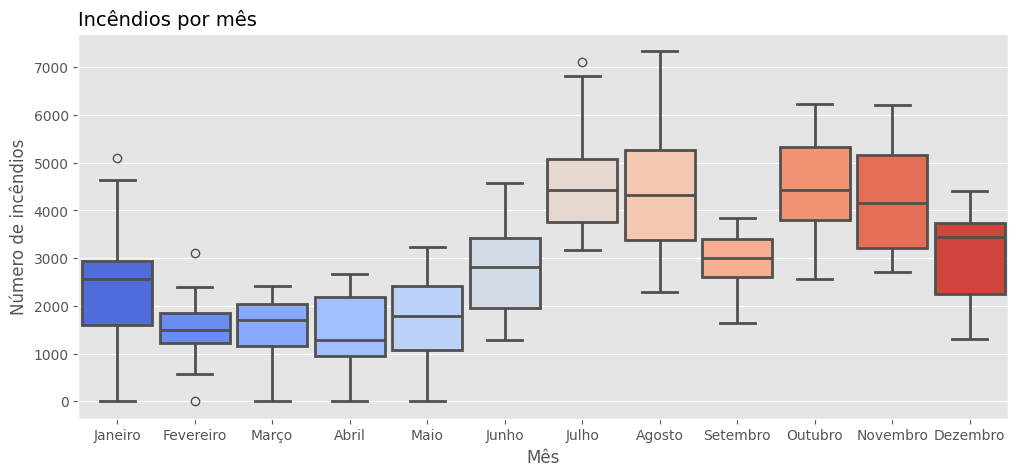

In [27]:
# Análise por ano dos incêndios
Analise_02 = Base_Dados.groupby( by=['year', 'month'] ).sum().reset_index()
Analise_02.head()

# Tamanho
plt.figure( figsize=(12, 5) )

# Gráfico
plt.title( 'Incêndios por mês', loc='left', fontsize=14 )
sns.boxplot( data=Analise_02, x='month', y='number', palette='coolwarm', saturation=1, width=0.9, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'] )

# Labels
plt.xlabel('Mês')
plt.ylabel('Número de incêndios');

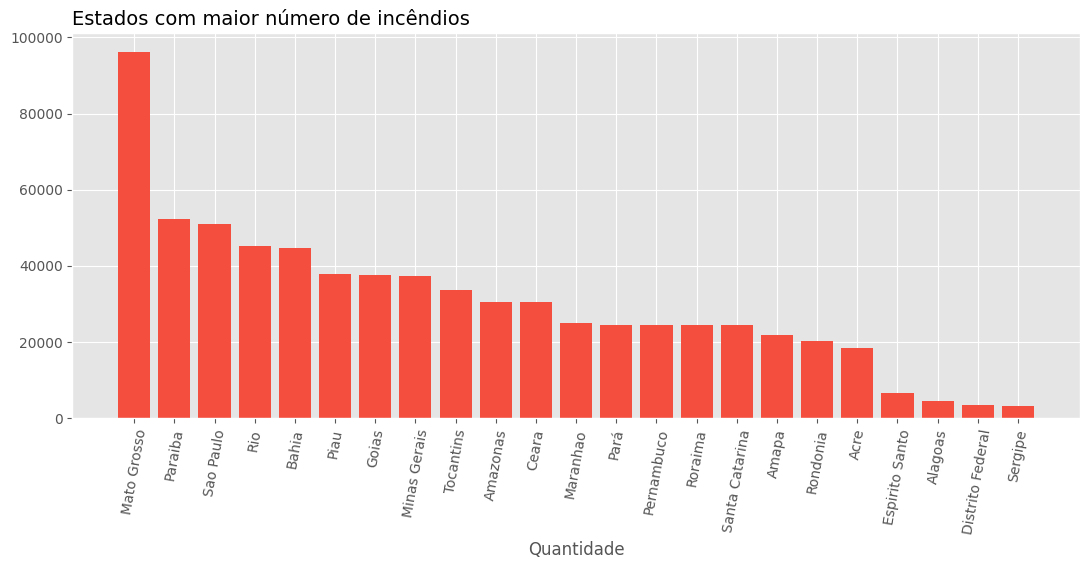

In [40]:
# Análise por ano dos incêndios
Analise_03 = Base_Dados.groupby( by=['state'] ).sum().reset_index()[['state', 'number']].sort_values( 'number', ascending=False )
Analise_03.head()

# Tamanho
plt.figure( figsize=(13, 5) )

# Gráfico
plt.title( 'Estados com maior número de incêndios', loc='left', fontsize=14 )

# Gráfico
plt.bar( Analise_03.state, Analise_03['number'], color='#f44e3f' )

# Labels
plt.xlabel('Quantidade')
plt.xticks( rotation=80 );

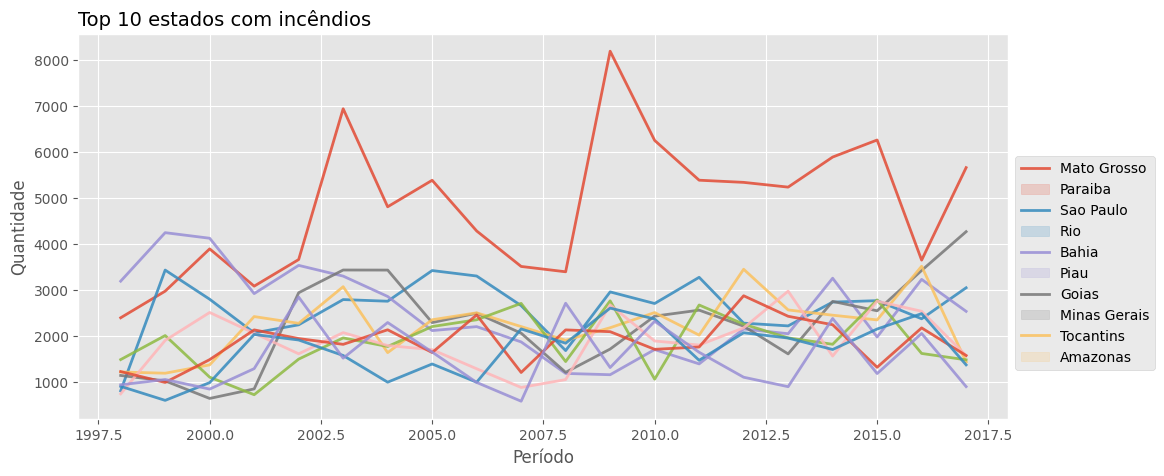

In [53]:
# Estados TOP 10
Lista_TOP10 = Analise_03['state'][0:10].values

# Tamanho
plt.figure( figsize=(12, 5) )

# Gráfico
plt.title( 'Top 10 estados com incêndios', loc='left', fontsize=14 )

# Loop
for Coluna in Lista_TOP10:

  # Filtrar o estado
  Filtro = Base_Dados.loc[ Base_Dados['state'] == Coluna ]

  # Agrupar os valores para sumarizar
  Analise_Local = Filtro.groupby( by=['year'] ).sum().reset_index()

  # Plot
  sns.lineplot( data=Analise_Local, x='year', y='number', lw=2, alpha=0.85 )

# Labels
plt.xlabel('Período')
plt.ylabel('Quantidade')

# Legenda
plt.legend( Lista_TOP10, bbox_to_anchor=(1, 0.7) );

In [55]:
# Plot geográfico

# Gerando os estados
Estados = Analise_03.sort_values('state')['state'].values

# Gerando os valores
Valores = Analise_03.sort_values('state')['number'].values

# Latitudes
Lat = [ -8.77, -9.71, 1.41, -3.07, -12.96, -3.71, -15.83, -19.19, -16.64, -2.55, -12.64,
       -18.10, -7.06, -5.53, -8.28, -8.28, -22.84, -11.22, 1.89, -27.33, -23.55, -10.90, -10.25 ]

# Longitudes
Log = [ -70.55, -35.73, -51.77, -61.66, -38.51, -38.54, -47.86, -40.34, -49.31, -44.30, -55.42, -44.38,
       -35.55, -52.29, -35.07, -43.68, -43.15, -62.80, -61.22, -49.44, -46.64, -37.07, -48.25 ]

# Organizando os dados
Dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Incêndios' : Valores
}

# Lendo o dicionário
Analise_Geografica = pd.DataFrame ( Dicionario )

Analise_Geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [59]:
# Fazendo o plot
import plotly.express as px

# Mapa de calor geográfico
px.density_mapbox(
    Analise_Geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='stamen-terrain'
)